Nama: Hamka

Topik : Machine Learning

tugas : Bisnis Intelegen


##Import Liblary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/latihan/latihan/BI/german_credit_data.csv')
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,little,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,little,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,little,little,9055,36,education
6,6,53,male,2,own,quite rich,little,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,little,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [4]:
# Menghapus kolom 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


##Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [7]:
# Menangani missing values
df['Saving accounts'].fillna('little', inplace=True)
df['Checking account'].fillna('little', inplace=True)

<ipython-input-7-77695618f69d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('little', inplace=True)
<ipython-input-7-77695618f69d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [9]:
# Mendefinisikan kolom fitur dan target
df_features = df.drop('Purpose', axis=1)
df_target = df['Purpose']

In [10]:
df_features

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,little,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,little,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24
...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12
996,40,male,3,own,little,little,3857,30
997,38,male,2,own,little,little,804,12
998,23,male,2,free,little,little,1845,45


###encoding

In [11]:
# Mengubah tipe data menjadi category
df_features[['Sex','Housing','Saving accounts','Checking account']] = df_features[['Sex',
'Housing', 'Saving accounts', 'Checking account']].astype('category')

# Cek hasil perubahan tipe data
df_features[['Sex','Housing', 'Saving accounts', 'Checking account']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Sex               1000 non-null   category
 1   Housing           1000 non-null   category
 2   Saving accounts   1000 non-null   category
 3   Checking account  1000 non-null   category
dtypes: category(4)
memory usage: 4.6 KB


In [12]:
# Encoding data dengan .cat.codes
df_features['Sex'] = df_features['Sex'].cat.codes
df_features['Housing']= df_features['Housing'].cat.codes
df_features['Saving accounts'] = df_features['Saving accounts'].cat.codes
df_features['Checking account'] = df_features['Checking account'].cat.codes

In [13]:
df_features.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
995,31,0,1,1,0,0,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,0,804,12
998,23,1,2,0,0,0,1845,45
999,27,1,2,1,1,1,4576,45


###Normalisasi

In [14]:
# Normalisasi data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(df_features).transform(df_features.astype(float))
X[0:5]

array([[ 2.76645648,  0.67028006,  0.14694918, -0.13371046, -0.4634091 ,
        -0.65383104, -0.74513141, -1.23647786],
       [-1.19140394, -1.49191369,  0.14694918, -0.13371046, -0.4634091 ,
         1.00143742,  0.94981679,  2.24819436],
       [ 1.18331231,  0.67028006, -1.38377145, -0.13371046, -0.4634091 ,
        -0.65383104, -0.41656241, -0.73866754],
       [ 0.8315025 ,  0.67028006,  0.14694918, -2.01695631, -0.4634091 ,
        -0.65383104,  1.63424694,  1.75038404],
       [ 1.53512213,  0.67028006,  0.14694918, -2.01695631, -0.4634091 ,
        -0.65383104,  0.5666635 ,  0.25695309]])

In [15]:
# Mendefinisikan data target
y = df_target
y[0:5]

,Purpose
0,radio/TV
1,radio/TV
2,education
3,furniture/equipment
4,car


### Train test split

In [16]:
# Train test split untuk membagi data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (800, 8) (800,)
Test set: (200, 8) (200,)


##Modeling

###KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
k = 5
# Train Model
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
model_knn

KNeighborsClassifier()

In [19]:
# Menguji model dengan data testing
y_pred = model_knn.predict(X_test)
y_pred[0:5]

array(['furniture/equipment', 'radio/TV', 'radio/TV', 'radio/TV',
       'radio/TV'], dtype=object)

In [20]:
y_test[0:5]

,Purpose
841,car
956,radio/TV
544,car
173,radio/TV
759,car


In [21]:
# Mengukur kinerja model machine learning
from sklearn.metrics import accuracy_score
print('Akurasi Train set: ', accuracy_score(y_train, model_knn.predict(X_train)))
print('Akurasi Test set: ', accuracy_score(y_test, y_pred))

Akurasi Train set:  0.535
Akurasi Test set:  0.375


In [22]:
# Mencari nilai K dengan akurasi terbaik
Ks = 15
mean_acc = np.zeros((Ks-1))
for n in range(1, Ks):

    #Train Model and Predict
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, y_pred)
    mean_acc

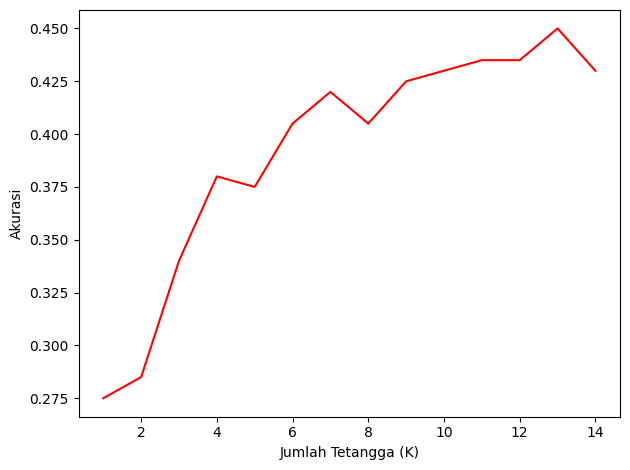

In [23]:
plt.plot(range(1,Ks), mean_acc, 'r')
plt.ylabel('Akurasi')
plt.xlabel('Jumlah Tetangga (K)')
plt.tight_layout()
plt.show()

In [24]:
print('Akurasi terbaik adalah ', mean_acc.max(), 'dengan nilai k =', mean_acc.argmax()+1)

Akurasi terbaik adalah  0.45 dengan nilai k = 13


In [25]:
#  dfbaru =  df.to_csv('/content/german_credit_data.csv')

###Decition tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Buat model Decision Tree
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=10)

# Latih model dengan data training
model_tree.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_tree = model_tree.predict(X_test)

# Cek akurasi
print("Akurasi Train set:", accuracy_score(y_train, model_tree.predict(X_train)))
print("Akurasi Test set:", accuracy_score(y_test, y_pred_tree))


Akurasi Train set: 0.435
Akurasi Test set: 0.31


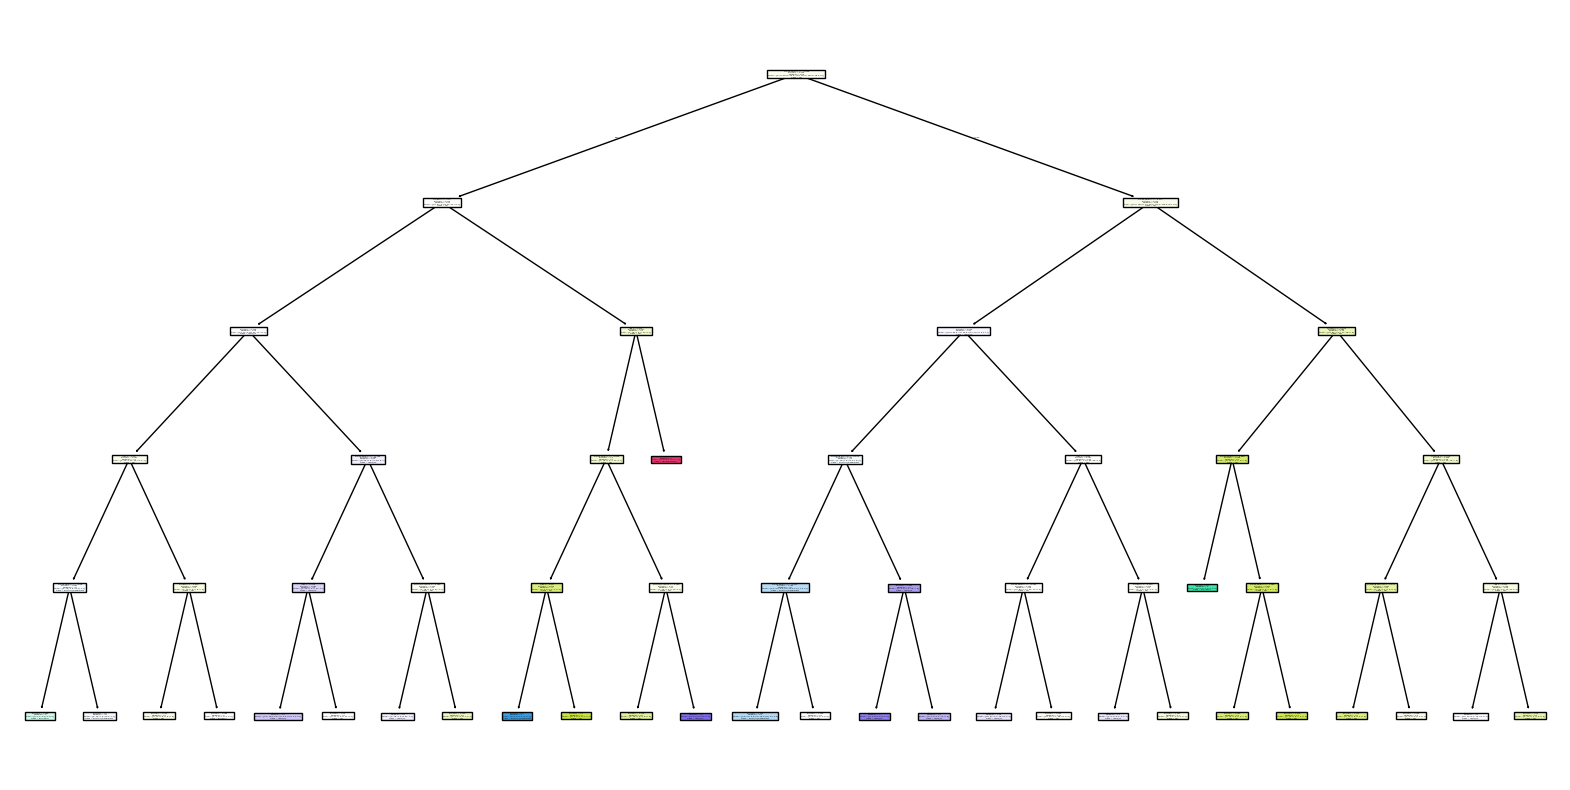

In [27]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_tree, filled=True, feature_names=df_features.columns, class_names=model_tree.classes_)
plt.show()